###Introducción de los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
import statsmodels.api as sm
from statsmodels.formula.api import ols
from google.colab import drive
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Ruta a la carpeta en tu Google Drive
folder_path = '/content/drive/MyDrive/ProyectoCoBios/Cuestionario_Clima_2023_Co_Depurado.xlsx'
df = pd.read_excel(folder_path,header=1)

In [3]:
df.head()

,Marca temporal,Código de la institución,1. Nombre de la institución,2. Tipo de Institución,3. Denominación de los servicios instituciones en salud,4. Área de trabajo.,5. Edad (años cumplidos),6. Sexo,7. Estado civil,8. Escolaridad,...,Equidad,Compromiso con la productividad,Compatibilidad de intereses,Intercambio de información,Involucración al cambio,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,PARTICIPACIÓN,Id
0,2018-12-17 09:16:57.471,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,30,Mujer,Casado,Técnico,...,3,5,4,1,3,3.75,4.00,4.00,3.25,0
1,2018-12-21 15:26:21.193,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,27,Hombre,Soltero,Universitaria,...,3,5,5,4,4,4.75,4.75,3.50,4.50,1
2,2018-12-21 15:33:46.427,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,21,Mujer,Soltero,Técnico,...,2,5,5,4,4,4.50,4.50,3.25,4.50,2
3,2018-12-21 15:46:42.083,76001CML,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,22,Mujer,Soltero,Universitaria,...,4,5,4,3,3,4.50,4.50,3.75,3.75,3
4,2018-12-21 15:59:00.247,76001CML,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,43,Mujer,Soltero,Secundaria,...,3,5,5,4,4,4.50,4.25,3.50,4.50,4


##PREPROCESO

In [4]:
### VERIFICAMOS SI HAY FILAS CON VALORES NULOS
# Verificar si existen valores nulos en el dataframe
NullRows = df.isnull().any(axis=1).any()

# Verificar si existen cadenas vacías en el dataframe
CleanRows = (df == '').any(axis=1).any()

print(NullRows,CleanRows)

False False


In [5]:
df

,Marca temporal,Código de la institución,1. Nombre de la institución,2. Tipo de Institución,3. Denominación de los servicios instituciones en salud,4. Área de trabajo.,5. Edad (años cumplidos),6. Sexo,7. Estado civil,8. Escolaridad,...,Equidad,Compromiso con la productividad,Compatibilidad de intereses,Intercambio de información,Involucración al cambio,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,PARTICIPACIÓN,Id
0,2018-12-17 09:16:57.471,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,30,Mujer,Casado,Técnico,...,3,5,4,1,3,3.75,4.00,4.00,3.25,0
1,2018-12-21 15:26:21.193,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,27,Hombre,Soltero,Universitaria,...,3,5,5,4,4,4.75,4.75,3.50,4.50,1
2,2018-12-21 15:33:46.427,76001CML,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,21,Mujer,Soltero,Técnico,...,2,5,5,4,4,4.50,4.50,3.25,4.50,2
3,2018-12-21 15:46:42.083,76001CML,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,22,Mujer,Soltero,Universitaria,...,4,5,4,3,3,4.50,4.50,3.75,3.75,3
4,2018-12-21 15:59:00.247,76001CML,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,43,Mujer,Soltero,Secundaria,...,3,5,5,4,4,4.50,4.25,3.50,4.50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2018-10-24 06:58:23.530,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial ambulatorio,32,Hombre,Unión Libre,Técnico,...,2,4,2,2,5,3.25,3.25,3.50,3.25,2011
2012,2018-10-24 07:03:45.019,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,43,Mujer,Soltero,Universitaria,...,2,3,2,2,0,1.75,3.75,3.50,1.75,2012
2013,2018-10-24 07:18:15.790,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Apoyo operativo,29,Mujer,Soltero,Técnico,...,4,4,3,3,3,3.50,3.75,3.75,3.25,2013
2014,2018-10-24 07:23:00.046,17001VAI,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,37,Hombre,Unión Libre,Técnico,...,2,4,2,3,1,2.75,4.00,3.25,2.50,2014


In [6]:
CualitativesValues=[
#'Código de la institución  '
'1. Nombre de la institución '
,'2. Tipo de Institución '
,'3. Denominación de los servicios instituciones en salud '
,'4. Área de trabajo.'
,'5. Edad (años cumplidos)'
,'6. Sexo','7. Estado civil'
,'8. Escolaridad'
,'9. Termino de contratación'
,'10. Tipo de contrato',
'11. Horas laboradas cada día en la institución '
,'12. Tiempo Laborado en la institución'
,'13. Tiempo Laborado en su actual área o servicio'
,'14. Tiempo laborado en su actual cargo']

CualitativesValuesOneHot=[
'1. Nombre de la institución '
,'2. Tipo de Institución '
,'4. Área de trabajo.'
,'6. Sexo'
,'7. Estado civil'
,'9. Termino de contratación'
,'10. Tipo de contrato',
]
CualitativesValuesOneHotPrefix=[
'NombreInstitución '
,'TipoInstitución '
,'ÁreaTrabajo'
,'Sexo'
,'EstadoCivil'
,'TerminoContratación'
,'TipoContrato',
]

CualitativesValuesLabelEncoding=[
'3. Denominación de los servicios instituciones en salud ',
'8. Escolaridad',
'5. Edad (años cumplidos)',
'11. Horas laboradas cada día en la institución ',
'12. Tiempo Laborado en la institución',
'13. Tiempo Laborado en su actual área o servicio',
'14. Tiempo laborado en su actual cargo',
]

In [7]:
df_filter_cualidades = df.iloc[:,2:16] ##SELECCIONAMOS TODAS LAS FILAS ## ELIMINAMOS LA FECHA
df_filter_cualidades_new=pd.DataFrame(df_filter_cualidades)

In [8]:
df_filter_cualidades_new

,1. Nombre de la institución,2. Tipo de Institución,3. Denominación de los servicios instituciones en salud,4. Área de trabajo.,5. Edad (años cumplidos),6. Sexo,7. Estado civil,8. Escolaridad,9. Termino de contratación,10. Tipo de contrato,11. Horas laboradas cada día en la institución,12. Tiempo Laborado en la institución,13. Tiempo Laborado en su actual área o servicio,14. Tiempo laborado en su actual cargo
0,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,30,Mujer,Casado,Técnico,Término indefinido,Prestación de servicios,1–4 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
1,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,27,Hombre,Soltero,Universitaria,Término indefinido,Por la institución,9-12 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
2,Centro médico laboral,Privada,Baja Complejidad,Asistencial ambulatorio,21,Mujer,Soltero,Técnico,Término indefinido,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
3,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,22,Mujer,Soltero,Universitaria,Término indefinido,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
4,Centro médico laboral,Privada,Baja Complejidad,Apoyo operativo,43,Mujer,Soltero,Secundaria,Término fijo,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial ambulatorio,32,Hombre,Unión Libre,Técnico,Prestación de servicios,Por Cooperativa o asociación,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año
2012,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,43,Mujer,Soltero,Universitaria,Término fijo,Por la institución,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año
2013,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Apoyo operativo,29,Mujer,Soltero,Técnico,Término fijo,Por Cooperativa o asociación,5-8 horas,De 1 a 5 años,Menos de 1 año,Menos de 1 año
2014,VIVA 1A IPS LAURELES,Privada,Mediana complejidad,Asistencial hospitalario,37,Hombre,Unión Libre,Técnico,Término fijo,Por la institución,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años


APLICAMOS ONE HOT ENCODING A ALGUNAS

In [9]:
# Aplica la codificación one-hot

# Aplica one-hot encoding a las columnas 'genero', 'tipo_contrato' y 'estado_civil'
df_encoded = pd.get_dummies(df_filter_cualidades[CualitativesValuesOneHot], prefix=CualitativesValuesOneHotPrefix)
df_encoded.columns = df_encoded.columns.str.replace('_', ' ')  # Reemplaza el separador por '.'
Arreglo = CualitativesValuesOneHot.copy()
# Concatena el DataFrame codificado con el DataFrame original
df_OneHot = pd.concat([df_filter_cualidades, df_encoded], axis=1)
df_OneHot.drop(Arreglo, axis=1, inplace=True)
df_OneHot

,3. Denominación de los servicios instituciones en salud,5. Edad (años cumplidos),8. Escolaridad,11. Horas laboradas cada día en la institución,12. Tiempo Laborado en la institución,13. Tiempo Laborado en su actual área o servicio,14. Tiempo laborado en su actual cargo,NombreInstitución CENTRO MEDICO POR SALUD,NombreInstitución CLINICA MARIANGEL TULUA,NombreInstitución CLINICA SAN JUAN DE DIOS DE MANIZALES,...,EstadoCivil Unión Libre,EstadoCivil Viudo,TerminoContratación Prestación de servicios,TerminoContratación Término fijo,TerminoContratación Término indefinido,TipoContrato Carrera administrativa,TipoContrato Otra,TipoContrato Por Cooperativa o asociación,TipoContrato Por la institución,TipoContrato Prestación de servicios
0,Baja Complejidad,30,Técnico,1–4 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,Baja Complejidad,27,Universitaria,9-12 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,Baja Complejidad,21,Técnico,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,Baja Complejidad,22,Universitaria,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,Baja Complejidad,43,Secundaria,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,Mediana complejidad,32,Técnico,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año,0,0,0,...,1,0,1,0,0,0,0,1,0,0
2012,Mediana complejidad,43,Universitaria,5-8 horas,Menos de 1 año,Menos de 1 año,Menos de 1 año,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2013,Mediana complejidad,29,Técnico,5-8 horas,De 1 a 5 años,Menos de 1 año,Menos de 1 año,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2014,Mediana complejidad,37,Técnico,5-8 horas,De 1 a 5 años,De 1 a 5 años,De 1 a 5 años,0,0,0,...,1,0,0,1,0,0,0,0,1,0


Aplicando ordinal encoding a otras variables

In [10]:
"""
APLICAMOS LABEL ENCODING A LAS VARIABLES QUE LO AMERITAN
"""
CualitativesValuesLabelEncoding=[
'3. Denominación de los servicios instituciones en salud ',
'8. Escolaridad',
'11. Horas laboradas cada día en la institución ',
'12. Tiempo Laborado en la institución',
'13. Tiempo Laborado en su actual área o servicio',
'14. Tiempo laborado en su actual cargo',
]

df_OneHot['Denominación de los servicios instituciones en saludEncoded'] = df_OneHot['3. Denominación de los servicios instituciones en salud '].map({'Alta complejidad': 2, 'Baja Complejidad': 0, 'Mediana complejidad':1})
df_OneHot['EscolaridadEncoded'] = df_OneHot['8. Escolaridad'].map({'Primaria': 0, 'Secundaria': 1,'Técnico':2,'Universitaria':3,'Posgrado':4})
df_OneHot['HorasLaboradasEncoded'] = df_OneHot['11. Horas laboradas cada día en la institución '].map({'1–4 horas':0, '5-8 horas':1,'9-12 horas':2,'Más de 12 horas':3})
df_OneHot['TiempoInstituciónEncoded'] = df_OneHot['12. Tiempo Laborado en la institución'].map({'De 1 a 5 años': 1, 'De 6 a 10 años': 2 ,'Menos de 1 año':0,'11 años o más':3})
df_OneHot['TiempoServicioEncoded'] = df_OneHot['13. Tiempo Laborado en su actual área o servicio'].map({'De 1 a 5 años': 1, 'De 6 a 10 años': 2 ,'Menos de 1 año':0,'11 años o más':3})
df_OneHot['TiempoActualEncoded'] = df_OneHot['14. Tiempo laborado en su actual cargo'].map({'De 1 a 5 años': 1, 'De 6 a 10 años': 2 ,'Menos de 1 año':0,'11 años o más':3})
df_OneHot.drop(CualitativesValuesLabelEncoding, axis=1, inplace=True)


df_filter_cualidades_new['DenominaciónDeLosServiciosInstitucionesEnSaludEncoded'] = df_filter_cualidades['3. Denominación de los servicios instituciones en salud '].map({'Alta complejidad': 2, 'Baja Complejidad': 0, 'Mediana complejidad':1})
df_filter_cualidades_new['EscolaridadEncoded'] = df_filter_cualidades['8. Escolaridad'].map({'Primaria': 0, 'Secundaria': 1,'Técnico':2,'Universitaria':3,'Posgrado':4})
df_filter_cualidades_new['HorasLaboradasEncoded'] = df_filter_cualidades['11. Horas laboradas cada día en la institución '].map({'1–4 horas':0, '5-8 horas':1,'9-12 horas':2,'Más de 12 horas':3})
df_filter_cualidades_new['TiempoInstituciónEncoded'] = df_filter_cualidades['12. Tiempo Laborado en la institución'].map({'De 1 a 5 años': 1, 'De 6 a 10 años': 2 ,'Menos de 1 año':0,'11 años o más':3})
df_filter_cualidades_new['TiempoServicioEncoded'] = df_filter_cualidades['13. Tiempo Laborado en su actual área o servicio'].map({'De 1 a 5 años': 1, 'De 6 a 10 años': 2 ,'Menos de 1 año':0,'11 años o más':3})
df_filter_cualidades_new['TiempoActualEncoded'] = df_filter_cualidades['14. Tiempo laborado en su actual cargo'].map({'De 1 a 5 años': 1, 'De 6 a 10 años': 2 ,'Menos de 1 año':0,'11 años o más':3})
df_filter_cualidades_new.drop(CualitativesValuesLabelEncoding, axis=1, inplace=True)

In [11]:
# Obtener la lista de nombres de columnas
column_names = df_OneHot.columns.tolist()

# Cambiar el nombre de la primera columna
column_names[0] = 'Edad'

# Asignar los nuevos nombres de columna al DataFrame
df_OneHot.columns = column_names

In [12]:
df_OneHot.head(35)

,Edad,NombreInstitución CENTRO MEDICO POR SALUD,NombreInstitución CLINICA MARIANGEL TULUA,NombreInstitución CLINICA SAN JUAN DE DIOS DE MANIZALES,NombreInstitución CLINICA VERSALLES,NombreInstitución Centro médico laboral,NombreInstitución Christus sinergia Tuluá,NombreInstitución ESE CAMILO TRUJILLO SILVA,NombreInstitución ESE HOSPITAL LOCAL DE CANDELARIA,NombreInstitución ESE HOSPITAL MUNICIPAL ALGECIRAS,...,TipoContrato Otra,TipoContrato Por Cooperativa o asociación,TipoContrato Por la institución,TipoContrato Prestación de servicios,Denominación de los servicios instituciones en saludEncoded,EscolaridadEncoded,HorasLaboradasEncoded,TiempoInstituciónEncoded,TiempoServicioEncoded,TiempoActualEncoded
0,30,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,2,0,1,1,1
1,27,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,3,2,1,1,1
2,21,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,2,1,1,1,1
3,22,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,3,1,1,1,1
4,43,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,1,1,1
5,28,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,2,1,0,0,0
6,20,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,2,1,0,1,1
7,30,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,2,2,0,0,0
8,30,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,2,2,0,0,0
9,28,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,2,1,0,0,0


In [13]:
df_filter_cualidades_new.head(35)

,1. Nombre de la institución,2. Tipo de Institución,4. Área de trabajo.,5. Edad (años cumplidos),6. Sexo,7. Estado civil,9. Termino de contratación,10. Tipo de contrato,DenominaciónDeLosServiciosInstitucionesEnSaludEncoded,EscolaridadEncoded,HorasLaboradasEncoded,TiempoInstituciónEncoded,TiempoServicioEncoded,TiempoActualEncoded
0,Centro médico laboral,Privada,Asistencial ambulatorio,30,Mujer,Casado,Término indefinido,Prestación de servicios,0,2,0,1,1,1
1,Centro médico laboral,Privada,Asistencial ambulatorio,27,Hombre,Soltero,Término indefinido,Por la institución,0,3,2,1,1,1
2,Centro médico laboral,Privada,Asistencial ambulatorio,21,Mujer,Soltero,Término indefinido,Por la institución,0,2,1,1,1,1
3,Centro médico laboral,Privada,Apoyo operativo,22,Mujer,Soltero,Término indefinido,Por la institución,0,3,1,1,1,1
4,Centro médico laboral,Privada,Apoyo operativo,43,Mujer,Soltero,Término fijo,Por la institución,0,1,1,1,1,1
5,Centro médico laboral,Privada,Apoyo operativo,28,Mujer,Soltero,Término indefinido,Por la institución,0,2,1,0,0,0
6,Centro médico laboral,Privada,Asistencial ambulatorio,20,Mujer,Soltero,Prestación de servicios,Prestación de servicios,0,2,1,0,1,1
7,Centro médico laboral,Privada,Asistencial ambulatorio,30,Mujer,Soltero,Prestación de servicios,Por la institución,0,2,2,0,0,0
8,Centro médico laboral,Privada,Asistencial ambulatorio,30,Mujer,Soltero,Prestación de servicios,Por la institución,0,2,2,0,0,0
9,Centro médico laboral,Privada,Apoyo operativo,28,Mujer,Soltero,Término indefinido,Por la institución,0,2,1,0,0,0


###MIRANDO FRECUENCIAS PARA CADA VARIABLE DE SALIDA

In [14]:
##DEFINIMOS LAS SALIDAS
df_filter_values = df.iloc[:,-5:-1]
df_filter_values

,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,PARTICIPACIÓN
0,3.75,4.00,4.00,3.25
1,4.75,4.75,3.50,4.50
2,4.50,4.50,3.25,4.50
3,4.50,4.50,3.75,3.75
4,4.50,4.25,3.50,4.50
...,...,...,...,...
2011,3.25,3.25,3.50,3.25
2012,1.75,3.75,3.50,1.75
2013,3.50,3.75,3.75,3.25
2014,2.75,4.00,3.25,2.50


##LIDERAZGO

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


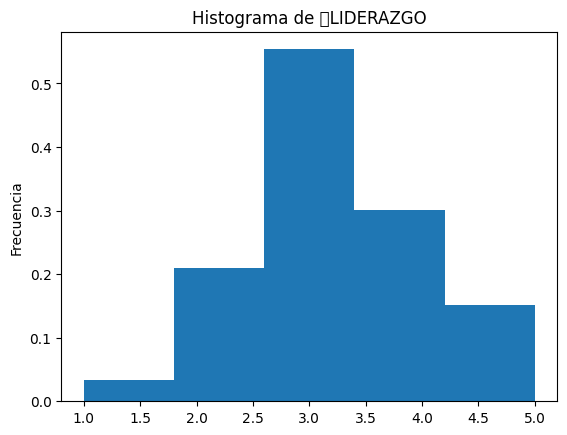

In [16]:
# Calcular los porcentajes manualmente
counts, bins, _ = plt.hist(df_filter_values['LIDERAZGO'], bins=5, density=True)
porcentajes = counts / sum(counts) * 100
# Generar un histograma de la columna 'Edad'
#plt.bar(bins[:-1], porcentajes, width=bins[1] - bins[0])
#plt.hist(df_filter_values['MOTIVACIÓN'], bins=4,density=True)

# Configurar los títulos y etiquetas
plt.title('Histograma de 	LIDERAZGO')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

Armando grupo similares

Bin 1: 1.0 - 1.8
Bin 2: 1.8 - 2.6
Bin 3: 2.6 - 3.4000000000000004
Bin 4: 3.4000000000000004 - 4.2
Bin 5: 4.2 - 5.0


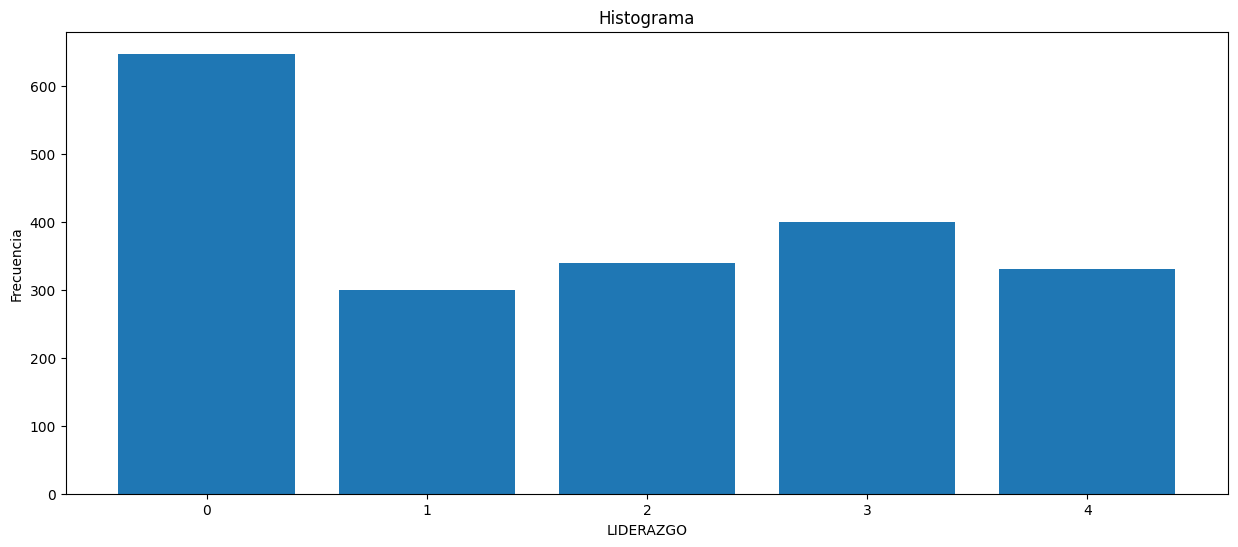

In [17]:
n_bins = 5
# Asignar rangos como etiquetas
labels = range(0, n_bins)
# df_filter_values['Categoria_Liderazgo'] = pd.qcut(df_filter_values['LIDERAZGO'], q=n_bins, labels=labels)
df_filter_values['CategoriaLIDERAZGO'] = pd.qcut(df_filter_values['LIDERAZGO'], q=n_bins, labels=labels)
# Obtener los conteos de observaciones en cada bin
counts = df_filter_values['CategoriaLIDERAZGO'].value_counts().sort_index()
# Imprimir los rangos de valores
for i in range(len(bins) - 1):
     range_values = f'{bins[i]} - {bins[i+1]}'
     print(f'Bin {i+1}: {range_values}')

# Configurar el tamaño de la figura
fig = plt.figure(figsize=(15, 6))  # Ajusta el ancho a 10 y el alto a 6

plt.bar(labels, counts)
plt.xlabel('LIDERAZGO')
plt.ylabel('Frecuencia')
plt.title('Histograma')
plt.show()


MIRANDO CADA DATAFRAME CON UNA CATEGORIA DE LIDERAZGO

In [19]:
df_filter_values=pd.concat([df_filter_values.iloc[:,:-2], df_filter_values['CategoriaLIDERAZGO']], axis=1)
df_filter_values

,LIDERAZGO,MOTIVACIÓN,RECIPROCIDAD,CategoriaLIDERAZGO
0,3.75,4.00,4.00,3
1,4.75,4.75,3.50,4
2,4.50,4.50,3.25,4
3,4.50,4.50,3.75,4
4,4.50,4.25,3.50,4
...,...,...,...,...
2011,3.25,3.25,3.50,2
2012,1.75,3.75,3.50,0
2013,3.50,3.75,3.75,3
2014,2.75,4.00,3.25,0


Generamos el set de datos

In [20]:
DataFrameLiderazgo_OneHot=pd.concat([df_OneHot, df_filter_values['CategoriaLIDERAZGO']], axis=1)
DataFrameLiderazgo=pd.concat([df_filter_cualidades_new, df_filter_values['CategoriaLIDERAZGO']], axis=1)

In [21]:
DataFrameLiderazgo_OneHot

,Edad,NombreInstitución CENTRO MEDICO POR SALUD,NombreInstitución CLINICA MARIANGEL TULUA,NombreInstitución CLINICA SAN JUAN DE DIOS DE MANIZALES,NombreInstitución CLINICA VERSALLES,NombreInstitución Centro médico laboral,NombreInstitución Christus sinergia Tuluá,NombreInstitución ESE CAMILO TRUJILLO SILVA,NombreInstitución ESE HOSPITAL LOCAL DE CANDELARIA,NombreInstitución ESE HOSPITAL MUNICIPAL ALGECIRAS,...,TipoContrato Por Cooperativa o asociación,TipoContrato Por la institución,TipoContrato Prestación de servicios,Denominación de los servicios instituciones en saludEncoded,EscolaridadEncoded,HorasLaboradasEncoded,TiempoInstituciónEncoded,TiempoServicioEncoded,TiempoActualEncoded,CategoriaLIDERAZGO
0,30,0,0,0,0,1,0,0,0,0,...,0,0,1,0,2,0,1,1,1,3
1,27,0,0,0,0,1,0,0,0,0,...,0,1,0,0,3,2,1,1,1,4
2,21,0,0,0,0,1,0,0,0,0,...,0,1,0,0,2,1,1,1,1,4
3,22,0,0,0,0,1,0,0,0,0,...,0,1,0,0,3,1,1,1,1,4
4,43,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,1,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,32,0,0,0,0,0,0,0,0,0,...,1,0,0,1,2,1,0,0,0,2
2012,43,0,0,0,0,0,0,0,0,0,...,0,1,0,1,3,1,0,0,0,0
2013,29,0,0,0,0,0,0,0,0,0,...,1,0,0,1,2,1,1,0,0,3
2014,37,0,0,0,0,0,0,0,0,0,...,0,1,0,1,2,1,1,1,1,0


In [22]:
DataFrameLiderazgo

,1. Nombre de la institución,2. Tipo de Institución,4. Área de trabajo.,5. Edad (años cumplidos),6. Sexo,7. Estado civil,9. Termino de contratación,10. Tipo de contrato,DenominaciónDeLosServiciosInstitucionesEnSaludEncoded,EscolaridadEncoded,HorasLaboradasEncoded,TiempoInstituciónEncoded,TiempoServicioEncoded,TiempoActualEncoded,CategoriaLIDERAZGO
0,Centro médico laboral,Privada,Asistencial ambulatorio,30,Mujer,Casado,Término indefinido,Prestación de servicios,0,2,0,1,1,1,3
1,Centro médico laboral,Privada,Asistencial ambulatorio,27,Hombre,Soltero,Término indefinido,Por la institución,0,3,2,1,1,1,4
2,Centro médico laboral,Privada,Asistencial ambulatorio,21,Mujer,Soltero,Término indefinido,Por la institución,0,2,1,1,1,1,4
3,Centro médico laboral,Privada,Apoyo operativo,22,Mujer,Soltero,Término indefinido,Por la institución,0,3,1,1,1,1,4
4,Centro médico laboral,Privada,Apoyo operativo,43,Mujer,Soltero,Término fijo,Por la institución,0,1,1,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,VIVA 1A IPS LAURELES,Privada,Asistencial ambulatorio,32,Hombre,Unión Libre,Prestación de servicios,Por Cooperativa o asociación,1,2,1,0,0,0,2
2012,VIVA 1A IPS LAURELES,Privada,Asistencial hospitalario,43,Mujer,Soltero,Término fijo,Por la institución,1,3,1,0,0,0,0
2013,VIVA 1A IPS LAURELES,Privada,Apoyo operativo,29,Mujer,Soltero,Término fijo,Por Cooperativa o asociación,1,2,1,1,0,0,3
2014,VIVA 1A IPS LAURELES,Privada,Asistencial hospitalario,37,Hombre,Unión Libre,Término fijo,Por la institución,1,2,1,1,1,1,0


Generamos train, validation, test data

Para datos Codificados

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Supongamos que tu dataframe se llama "df" y la columna de categorías se llama "categoria"

# Crear un diccionario para almacenar los tamaños deseados de cada categoría en el conjunto de entrenamiento
tamanos_categorias = {
    1: 240,
    2: 240,
    3: 240,
    4: 240,
    0: 240
}

# Dividir el conjunto de datos en entrenamiento y el resto
df_train, df_rest = train_test_split(DataFrameLiderazgo_OneHot, test_size=0.2, stratify=DataFrameLiderazgo['CategoriaLIDERAZGO'])

# Dividir el resto en validación y prueba
df_val_Onehot, df_test_Onehot = train_test_split(df_rest, test_size=0.5, stratify=df_rest['CategoriaLIDERAZGO'])

# Crear listas vacías para almacenar los conjuntos finales
conjuntos_entrenamiento = []
conjuntos_entrenamiento_balanceados = []

# Generar conjuntos de entrenamiento balanceados por categoría
for categoria, tamano in tamanos_categorias.items():
    # Filtrar las muestras de la categoría actual
    muestras_categoria = df_train[df_train['CategoriaLIDERAZGO'] == categoria]
    
    # Tomar solo las primeras 'tamano' muestras de la categoría actual
    muestras_seleccionadas = muestras_categoria[:tamano]
    
    # Agregar las muestras seleccionadas al conjunto de entrenamiento balanceado
    conjuntos_entrenamiento_balanceados.append(muestras_seleccionadas)
    
    # Agregar todas las muestras de la categoría actual al conjunto de entrenamiento sin balancear
    conjuntos_entrenamiento.append(muestras_categoria)

# Concatenar los conjuntos de entrenamiento balanceados y sin balancear
df_train_balanceado_Onehot = pd.concat(conjuntos_entrenamiento_balanceados)
df_train_sin_balancear_Onehot = pd.concat(conjuntos_entrenamiento)

# Mostrar la información del conjunto de entrenamiento balanceado
print("Conjunto de entrenamiento balanceado:")
print(df_train_balanceado_Onehot['CategoriaLIDERAZGO'].value_counts())

# Mostrar la información del conjunto de entrenamiento sin balancear
print("Conjunto de entrenamiento sin balancear:")
print(df_train_sin_balancear_Onehot['CategoriaLIDERAZGO'].value_counts())

# Mostrar la información del conjunto de validación
print("Conjunto de validación:")
print(df_val_Onehot['CategoriaLIDERAZGO'].value_counts())

# Mostrar la información del conjunto de prueba
print("Conjunto de prueba:")
print(df_test_Onehot['CategoriaLIDERAZGO'].value_counts())

Conjunto de entrenamiento balanceado:
0    240
1    240
2    240
3    240
4    240
Name: CategoriaLIDERAZGO, dtype: int64
Conjunto de entrenamiento sin balancear:
0    517
3    319
2    272
4    264
1    240
Name: CategoriaLIDERAZGO, dtype: int64
Conjunto de validación:
0    65
3    40
2    34
4    33
1    30
Name: CategoriaLIDERAZGO, dtype: int64
Conjunto de prueba:
0    65
3    40
2    34
4    33
1    30
Name: CategoriaLIDERAZGO, dtype: int64


Para datos sin one Hot

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Supongamos que tu dataframe se llama "df" y la columna de categorías se llama "categoria"

# Crear un diccionario para almacenar los tamaños deseados de cada categoría en el conjunto de entrenamiento
tamanos_categorias = {
    1: 240,
    2: 240,
    3: 240,
    4: 240,
    0: 240
}

# Dividir el conjunto de datos en entrenamiento y el resto
df_train, df_rest = train_test_split(DataFrameLiderazgo, test_size=0.2, stratify=DataFrameLiderazgo['CategoriaLIDERAZGO'])

# Dividir el resto en validación y prueba
df_val, df_test = train_test_split(df_rest, test_size=0.5, stratify=df_rest['CategoriaLIDERAZGO'])

# Crear listas vacías para almacenar los conjuntos finales
conjuntos_entrenamiento = []
conjuntos_entrenamiento_balanceados = []

# Generar conjuntos de entrenamiento balanceados por categoría
for categoria, tamano in tamanos_categorias.items():
    # Filtrar las muestras de la categoría actual
    muestras_categoria = df_train[df_train['CategoriaLIDERAZGO'] == categoria]
    
    # Tomar solo las primeras 'tamano' muestras de la categoría actual
    muestras_seleccionadas = muestras_categoria[:tamano]
    
    # Agregar las muestras seleccionadas al conjunto de entrenamiento balanceado
    conjuntos_entrenamiento_balanceados.append(muestras_seleccionadas)
    
    # Agregar todas las muestras de la categoría actual al conjunto de entrenamiento sin balancear
    conjuntos_entrenamiento.append(muestras_categoria)

# Concatenar los conjuntos de entrenamiento balanceados y sin balancear
df_train_balanceado = pd.concat(conjuntos_entrenamiento_balanceados)
df_train_sin_balancear = pd.concat(conjuntos_entrenamiento)

# Mostrar la información del conjunto de entrenamiento balanceado
print("Conjunto de entrenamiento balanceado:")
print(df_train_balanceado['CategoriaLIDERAZGO'].value_counts())

# Mostrar la información del conjunto de entrenamiento sin balancear
print("Conjunto de entrenamiento sin balancear:")
print(df_train_sin_balancear['CategoriaLIDERAZGO'].value_counts())

# Mostrar la información del conjunto de validación
print("Conjunto de validación:")
print(df_val['CategoriaLIDERAZGO'].value_counts())

# Mostrar la información del conjunto de prueba
print("Conjunto de prueba:")
print(df_test['CategoriaLIDERAZGO'].value_counts())


Conjunto de entrenamiento balanceado:
0    240
1    240
2    240
3    240
4    240
Name: CategoriaLIDERAZGO, dtype: int64
Conjunto de entrenamiento sin balancear:
0    517
3    319
2    272
4    264
1    240
Name: CategoriaLIDERAZGO, dtype: int64
Conjunto de validación:
0    65
3    40
2    34
4    33
1    30
Name: CategoriaLIDERAZGO, dtype: int64
Conjunto de prueba:
0    65
3    40
2    34
4    33
1    30
Name: CategoriaLIDERAZGO, dtype: int64


Conjunto de training balanceado

##Generando modelo logistico (catboost)

In [28]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.9 MB/s eta 0:00:00


In [29]:
X_train=df_train_balanceado.iloc[:,:-1]
Y_train=df_train_balanceado.iloc[:,-1]
X_val=df_val.iloc[:,:-1]
Y_val=df_val.iloc[:,-1]
X_test=df_test.iloc[:,:-1]
Y_test=df_test.iloc[:,-1]

In [30]:
from catboost import CatBoostClassifier

In [31]:
y_total= pd.DataFrame(df_filter_values.iloc[:,-1], columns=['CategoriaLIDERAZGO'])
y_total

,CategoriaLIDERAZGO
0,3
1,4
2,4
3,4
4,4
...,...
2011,2
2012,0
2013,3
2014,0


In [32]:
# Definir las métricas a registrar
# Crear un modelo de CatBoost
model = CatBoostClassifier(iterations=3000, learning_rate=0.2,l2_leaf_reg=5, max_depth=11 ,early_stopping_rounds=70) 
#model = CatBoostClassifier(iterations=3000, learning_rate=0.2,l2_leaf_reg=5, max_depth=11 ,early_stopping_rounds=70) 69
#model = CatBoostClassifier(iterations=3000, learning_rate=0.1,l2_leaf_reg=5, max_depth=9 ,early_stopping_rounds=70) 67
#model = CatBoostClassifier(iterations=1000, learning_rate=0.1,l2_leaf_reg=5, max_depth=8 ,early_stopping_rounds=50) 64
#CatBoostClassifier(iterations=1000, learning_rate=0.8,l2_leaf_reg=5, max_depth=11 ,early_stopping_rounds=50) 59
# Entrenar el modelo
model.fit(DataFrameLiderazgo.iloc[:,:-1], y_total, cat_features=[
 '1. Nombre de la institución ',
 '2. Tipo de Institución ',
 '4. Área de trabajo.',
 '5. Edad (años cumplidos)',
 '6. Sexo',
 '7. Estado civil',
 '9. Termino de contratación',
 '10. Tipo de contrato'
 ], 
 eval_set=(X_val, Y_val))


0:	learn: 1.5551041	test: 1.5615830	best: 1.5615830 (0)	total: 917ms	remaining: 45m 50s
1:	learn: 1.5096059	test: 1.5129082	best: 1.5129082 (1)	total: 1.64s	remaining: 41m 5s
2:	learn: 1.4773278	test: 1.4862138	best: 1.4862138 (2)	total: 2.34s	remaining: 38m 55s
3:	learn: 1.4463240	test: 1.4640043	best: 1.4640043 (3)	total: 2.91s	remaining: 36m 18s
4:	learn: 1.4196037	test: 1.4496476	best: 1.4496476 (4)	total: 3.44s	remaining: 34m 19s
5:	learn: 1.3932676	test: 1.4320557	best: 1.4320557 (5)	total: 3.88s	remaining: 32m 14s
6:	learn: 1.3771306	test: 1.4153856	best: 1.4153856 (6)	total: 3.88s	remaining: 27m 39s
7:	learn: 1.3553183	test: 1.4016507	best: 1.4016507 (7)	total: 4.34s	remaining: 27m 3s
8:	learn: 1.3367252	test: 1.3928160	best: 1.3928160 (8)	total: 4.88s	remaining: 27m 1s
9:	learn: 1.3189425	test: 1.3851767	best: 1.3851767 (9)	total: 5.36s	remaining: 26m 42s
10:	learn: 1.3040594	test: 1.3744570	best: 1.3744570 (10)	total: 5.8s	remaining: 26m 15s
11:	learn: 1.2850128	test: 1.36549

##Guardamos el modelo

In [ ]:
# Guardar el modelo
model.save_model('/content/drive/MyDrive/ModelosCO/modelo_PARTICIPACIÓN_text.cb')


In [ ]:
# Cargar el modelo
modeloPrueba = CatBoostClassifier()
modeloPrueba.load_model('/content/drive/MyDrive/ModelosCO/modelo_PARTICIPACIÓN_text.cb')

In [ ]:
# Utilizar el modelo cargado
predictions = modeloPrueba.predict(X_train)
accuracy = (predictions == np.expand_dims(Y_train.values, axis=-1)).mean()
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 58.48%


In [ ]:
# Obtener los pesos de los atributos
feature_weights = modeloPrueba.get_feature_importance()

In [ ]:
# Obtener los pesos de los atributos
feature_weights = modeloPrueba.get_feature_importance()
# Obtener los índices que ordenan los pesos en orden descendente
sorted_indices = np.argsort(feature_weights)[::-1]

# Imprimir los atributos y sus pesos en orden descendente
for idx in sorted_indices:
    feature_name = X_train.columns[idx]
    weight = feature_weights[idx]
    print(f"Atributo: {feature_name}, Peso: {weight}")

Atributo: 5. Edad (años cumplidos), Peso: 21.01730676241171
Atributo: 1. Nombre de la institución , Peso: 20.21965959385883
Atributo: 4. Área de trabajo., Peso: 14.061812028951152
Atributo: 7. Estado civil, Peso: 12.464242618095351
Atributo: 9. Termino de contratación, Peso: 9.463665647063102
Atributo: 10. Tipo de contrato, Peso: 9.042469501112302
Atributo: Escolaridad_encoded, Peso: 4.41105378333506
Atributo: Horas laboradas_encoded, Peso: 3.0095078781562212
Atributo: 6. Sexo, Peso: 2.8726172888334274
Atributo: Tiempo_servicio_encoded, Peso: 1.268187833437673
Atributo: Tiempo_institución_encoded, Peso: 0.9273155329020027
Atributo: Tiempo_actual_encoded, Peso: 0.7624460085936383
Atributo: 2. Tipo de Institución , Peso: 0.359118229088588
Atributo: Denominación de los servicios instituciones en salud_encoded, Peso: 0.12059729416112418


##PROBANDO CON SET ONEHOT

In [33]:
X_train_Onehot=df_train_balanceado_Onehot.iloc[:,:-1]
Y_train_Onehot=df_train_balanceado_Onehot.iloc[:,-1]
X_val_Onehot=df_val_Onehot.iloc[:,:-1]
Y_val_Onehot=df_val_Onehot.iloc[:,-1]
X_test_Onehot=df_test_Onehot.iloc[:,:-1]
Y_test_Onehot=df_test_Onehot.iloc[:,-1]

In [35]:
y_total= pd.DataFrame( DataFrameLiderazgo_OneHot.iloc[:,-1], columns=['CategoriaLIDERAZGO'])
y_total

,CategoriaLIDERAZGO
0,3
1,4
2,4
3,4
4,4
...,...
2011,2
2012,0
2013,3
2014,0


In [36]:
DataFrameLiderazgo_OneHot.iloc[:,:-1]

,Edad,NombreInstitución CENTRO MEDICO POR SALUD,NombreInstitución CLINICA MARIANGEL TULUA,NombreInstitución CLINICA SAN JUAN DE DIOS DE MANIZALES,NombreInstitución CLINICA VERSALLES,NombreInstitución Centro médico laboral,NombreInstitución Christus sinergia Tuluá,NombreInstitución ESE CAMILO TRUJILLO SILVA,NombreInstitución ESE HOSPITAL LOCAL DE CANDELARIA,NombreInstitución ESE HOSPITAL MUNICIPAL ALGECIRAS,...,TipoContrato Otra,TipoContrato Por Cooperativa o asociación,TipoContrato Por la institución,TipoContrato Prestación de servicios,Denominación de los servicios instituciones en saludEncoded,EscolaridadEncoded,HorasLaboradasEncoded,TiempoInstituciónEncoded,TiempoServicioEncoded,TiempoActualEncoded
0,30,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,2,0,1,1,1
1,27,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,3,2,1,1,1
2,21,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,2,1,1,1,1
3,22,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,3,1,1,1,1
4,43,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,32,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,2,1,0,0,0
2012,43,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,3,1,0,0,0
2013,29,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,2,1,1,0,0
2014,37,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,2,1,1,1,1


In [ ]:
# Crear un modelo de CatBoost
model = CatBoostClassifier(iterations=500, learning_rate=0.2,l2_leaf_reg=5, max_depth=11 ,early_stopping_rounds=70) 
model.fit(DataFrameLiderazgo_OneHot.iloc[:,:-1], y_total, 
 eval_set=(X_val_Onehot, Y_val_Onehot))

0:	learn: 1.5607470	test: 1.5627147	best: 1.5627147 (0)	total: 114ms	remaining: 56.6s
1:	learn: 1.5204495	test: 1.5197343	best: 1.5197343 (1)	total: 175ms	remaining: 43.6s
2:	learn: 1.4826799	test: 1.4802782	best: 1.4802782 (2)	total: 237ms	remaining: 39.3s
3:	learn: 1.4548835	test: 1.4521512	best: 1.4521512 (3)	total: 293ms	remaining: 36.4s
4:	learn: 1.4266997	test: 1.4216289	best: 1.4216289 (4)	total: 359ms	remaining: 35.5s
5:	learn: 1.3951411	test: 1.3928886	best: 1.3928886 (5)	total: 419ms	remaining: 34.5s
6:	learn: 1.3812864	test: 1.3797420	best: 1.3797420 (6)	total: 422ms	remaining: 29.7s
7:	learn: 1.3575067	test: 1.3527849	best: 1.3527849 (7)	total: 480ms	remaining: 29.5s
8:	learn: 1.3356706	test: 1.3316603	best: 1.3316603 (8)	total: 541ms	remaining: 29.5s
9:	learn: 1.3190386	test: 1.3162351	best: 1.3162351 (9)	total: 601ms	remaining: 29.4s
10:	learn: 1.2976514	test: 1.2939537	best: 1.2939537 (10)	total: 663ms	remaining: 29.5s
11:	learn: 1.2782824	test: 1.2724138	best: 1.2724138

##MODELO XGBOOST

In [37]:
import xgboost as xgb

# Obtén las características y la variable objetivo
X = DataFrameLiderazgo_OneHot.iloc[:,:-1]
y = y_total

# Definir los parámetros del modelo XGBoost
params = {
    'objective': 'multi:softprob',
    'num_class': 5,  # Número de clases
    # Otros parámetros del modelo
}

# Entrenar el modelo XGBoost
xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X, y.values, verbose=True)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=5,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [38]:
# Realizar predicciones en el conjunto de datos de validación
y_pred = xgb_model.predict(X_val_Onehot)

In [39]:
Y_val_Onehot.values

[4, 4, 0, 0, 4, ..., 3, 2, 1, 2, 1]
Length: 202
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [40]:
y_pred

array([4, 4, 0, 0, 4, 4, 4, 3, 2, 2, 3, 0, 0, 0, 0, 0, 3, 3, 2, 4, 0, 0,
       2, 0, 0, 0, 2, 1, 0, 0, 3, 4, 2, 4, 2, 4, 1, 0, 2, 1, 4, 0, 0, 0,
       0, 4, 0, 4, 3, 2, 2, 1, 3, 0, 3, 0, 2, 3, 0, 4, 0, 4, 4, 0, 4, 2,
       0, 4, 2, 0, 0, 1, 0, 2, 1, 0, 3, 1, 3, 3, 1, 3, 0, 2, 0, 3, 0, 0,
       2, 4, 3, 3, 3, 4, 0, 0, 4, 3, 3, 0, 2, 2, 0, 4, 1, 4, 0, 3, 0, 3,
       0, 0, 0, 4, 4, 1, 2, 0, 3, 4, 0, 3, 4, 3, 0, 0, 0, 3, 0, 1, 0, 0,
       0, 2, 4, 0, 0, 1, 0, 0, 0, 4, 0, 3, 4, 1, 1, 1, 0, 2, 1, 3, 3, 4,
       2, 2, 3, 2, 0, 3, 4, 2, 1, 4, 2, 2, 4, 3, 4, 0, 1, 2, 2, 4, 0, 0,
       0, 4, 0, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 4, 0, 3, 0, 0, 2, 4, 3,
       0, 2, 2, 1])

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [43]:
# Calcular las métricas de evaluación
accuracy = accuracy_score(Y_val_Onehot.values, y_pred)
precision = precision_score(Y_val_Onehot.values, y_pred, average='macro')
recall = recall_score(Y_val_Onehot.values, y_pred, average='macro')
f1 = f1_score(Y_val_Onehot.values, y_pred, average='macro')

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8564356435643564
Precision: 0.8744722328515572
Recall: 0.8449273275743863
F1-score: 0.8535501925450703


##GUARDANDO

In [ ]:
import joblib

In [ ]:
# Guardar el modelo en un archivo
joblib.dump(xgb_model, '/content/drive/MyDrive/ModelosCO/PARTICIPACIÓN_MODELO_XGB_NEW.joblib')

['/content/drive/MyDrive/ModelosCO/PARTICIPACIÓN_MODELO_XGB_NEW.joblib']

In [ ]:
# Cargar el modelo desde el archivo
modelo_cargado = joblib.load('/content/drive/MyDrive/ModelosCO/PARTICIPACIÓN_MODELO_XGB_NEW.joblib')

In [ ]:
# Realizar predicciones en el conjunto de datos de validación
y_pred = modelo_cargado.predict(X_val_Onehot)

In [ ]:
y_pred

array([1, 2, 0, 1, 4, 0, 4, 0, 0, 4, 0, 0, 4, 2, 0, 0, 4, 4, 1, 0, 1, 4,
       0, 1, 1, 0, 0, 3, 0, 2, 1, 0, 3, 0, 2, 3, 4, 0, 1, 2, 0, 1, 3, 0,
       0, 0, 0, 3, 4, 1, 4, 2, 2, 1, 4, 1, 0, 3, 2, 3, 2, 3, 0, 4, 1, 0,
       3, 2, 0, 0, 0, 0, 3, 4, 4, 0, 2, 0, 3, 2, 4, 0, 0, 3, 4, 0, 1, 0,
       1, 3, 0, 0, 2, 1, 3, 4, 2, 3, 3, 3, 1, 4, 0, 1, 0, 4, 0, 0, 2, 4,
       2, 4, 0, 4, 3, 2, 0, 0, 1, 4, 3, 0, 0, 3, 4, 3, 3, 4, 2, 0, 4, 2,
       2, 2, 4, 1, 3, 1, 3, 2, 1, 4, 4, 3, 2, 0, 0, 2, 0, 2, 2, 3, 1, 0,
       0, 3, 0, 3, 4, 0, 2, 3, 3, 3, 0, 2, 1, 0, 1, 2, 1, 0, 3, 0, 0, 4,
       4, 0, 1, 1, 1, 0, 0, 0, 0, 4, 1, 0, 1, 0, 1, 0, 0, 0, 4, 0, 0, 2,
       0, 0, 3, 0])